**matplotlib homework by Gerard Tieng**  
**October 12, 2019**  

---

# Key Takeaways
---

### 1:  Of the four drug samples, Capomulin seemed most effective against tumors in mice with high survivabiity rates and decreases in tumor volumes.  
  

### 2:  The particular type of tumor observed in the mice appear to have its deadliest period in the days between days 35-45 with the highest jumps in tumor volume and declines in survivability.  
  
  
### 3:  All observed drugs appear to have some effect in reducing metastatic sites of tumors.


# Pre-Work & Setup

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# load & read csv files
trials_path = "data/clinicaltrial_data.csv"
trials_df = pd.read_csv(trials_path)

mice_path = "data/mouse_drug_data.csv"
mice_df = pd.read_csv(mice_path)

# merge data and display
combined_df = trials_df.merge(mice_df, on= "Mouse ID")
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


# Tumor Response to Treatment

## Part 1 - Mean Calculation

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tr_mean = combined_df.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]

# Convert to DataFrame
tr_mean_df = pd.DataFrame(tr_mean).reset_index()

# Preview DataFrame
tr_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


## Part 2 - Standard Error Calculation

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tr_sem = combined_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tr_sem_df = pd.DataFrame(tr_sem).reset_index()

# Preview DataFrame
tr_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
alldrugs_mean = tr_mean_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
alldrugs_mean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Part 3 - Mean & Standard Error Plot

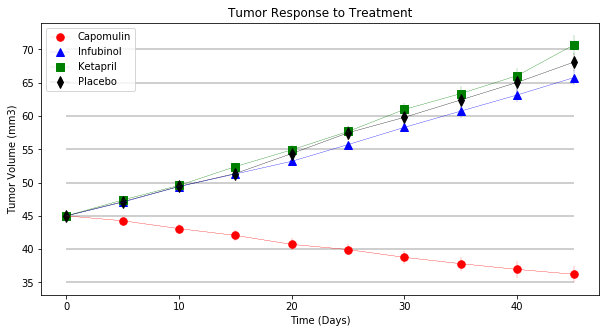

In [5]:
# Generate the Plot (with Error Bars)

#general figure size
plt.figure(figsize=[10,5])


#lines & error lines
tr_c = plt.plot(alldrugs_mean.index, alldrugs_mean["Capomulin"], color = "r", marker = ".", linestyle = ":", linewidth = 0.25, markersize=15)
tr_c_err = plt.errorbar(alldrugs_mean.index, tr_mean["Capomulin"], tr_sem["Capomulin"], color="r", linewidth = 0.25)

tr_i = plt.plot(alldrugs_mean.index, alldrugs_mean["Infubinol"], color = "b", marker = "^", linestyle = ":", linewidth = 0.25, markersize=8)
tr_i_err = plt.errorbar(alldrugs_mean.index, tr_mean["Infubinol"], tr_sem["Infubinol"], color="b", linewidth = 0.25)

tr_k = plt.plot(alldrugs_mean.index, alldrugs_mean["Ketapril"], color = "g", marker = "s", linestyle = ":", linewidth = 0.25, markersize=8)
tr_k_err = plt.errorbar(alldrugs_mean.index, tr_mean["Ketapril"], tr_sem["Ketapril"], color="g", linewidth = 0.25)

tr_p = plt.plot(alldrugs_mean.index, alldrugs_mean["Placebo"], color = "k", marker = "d", linestyle = ":", linewidth = 0.25, markersize=8)
tr_p_err = plt.errorbar(alldrugs_mean.index, tr_mean["Placebo"], tr_sem["Placebo"], color="k", linewidth = 0.25)

# labels and legend
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.hlines([np.arange(35,75,5)],0,45, alpha = 0.25)
plt.legend([tr_c, tr_i, tr_k, tr_p], labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc = "upper left")

#save and show
plt.savefig("1_tumorvolume_X_time.png")
plt.show()

# Metastatic Response to Treatment

## Part 1 - Mean Calculation

In [6]:
meta_mean = combined_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
meta_mean_df = pd.DataFrame(meta_mean).reset_index()

meta_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


## Part 2 - Standard Error Calculation

In [7]:
meta_sem = combined_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
meta_sem_df = pd.DataFrame(meta_sem).reset_index()

meta_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [8]:
allmeta_mean = meta_mean_df.pivot(index="Timepoint", columns="Drug", values="Metastatic Sites")
allmeta_mean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


## Part 3 - Mean and Standard Error Plot

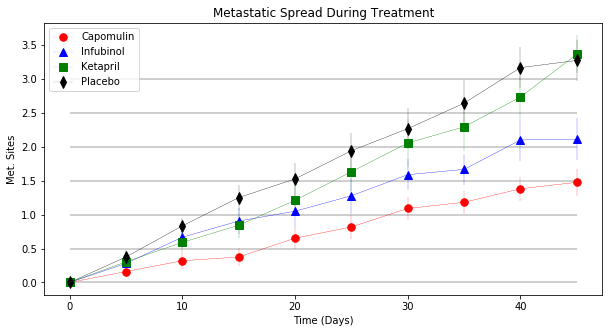

In [9]:
#general figure size
plt.figure(figsize=[10,5])


#lines & error lines
meta_c = plt.plot(allmeta_mean.index, allmeta_mean["Capomulin"], color = "r", marker = ".", linestyle = ":", linewidth = 0.25, markersize=15)
meta_c_err = plt.errorbar(allmeta_mean.index, meta_mean["Capomulin"], meta_sem["Capomulin"], color="r", linewidth = 0.25)

meta_i = plt.plot(allmeta_mean.index, allmeta_mean["Infubinol"], color = "b", marker = "^", linestyle = ":", linewidth = 0.25, markersize=8)
meta_i_err = plt.errorbar(allmeta_mean.index, meta_mean["Infubinol"], meta_sem["Infubinol"], color="b", linewidth = 0.25)

meta_k = plt.plot(allmeta_mean.index, allmeta_mean["Ketapril"], color = "g", marker = "s", linestyle = ":", linewidth = 0.25, markersize=8)
meta_k_err = plt.errorbar(allmeta_mean.index, meta_mean["Ketapril"], meta_sem["Ketapril"], color="g", linewidth = 0.25)

meta_p = plt.plot(allmeta_mean.index, allmeta_mean["Placebo"], color = "k", marker = "d", linestyle = ":", linewidth = 0.25, markersize=8)
meta_p_err = plt.errorbar(allmeta_mean.index, meta_mean["Placebo"], meta_sem["Placebo"], color="k", linewidth = 0.25)

# labels and legend
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Met. Sites")
plt.hlines([np.arange(0,3.5,0.5)],0,45, alpha = 0.25)
plt.legend([meta_c, meta_i, meta_k, meta_p], labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc = "upper left")

#save and show

plt.savefig("2_metastatic_x_time.png")
plt.show()

# Survival Rates 

## Part 1 - Calculate Mouse Totals

In [10]:
m_count = combined_df.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
m_count_df = pd.DataFrame(m_count).reset_index()
m_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


## Part 2 - Calculate Mice at Each Checkpoint

In [11]:
all_count = m_count_df.pivot(index= "Timepoint", columns= "Drug", values= "Mouse ID") / 25 * 100
all_count.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0


## Part 3 - Plot Mice Survival Rate

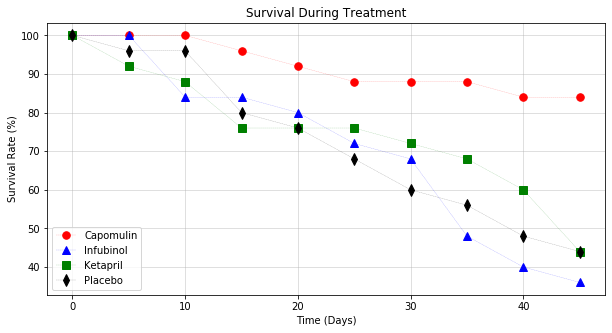

In [12]:
# Generate the Plot (Accounting for percentages)

# general figure size
plt.figure(figsize = [10,5])

# generate lines
m_c = plt.plot(all_count.index, all_count["Capomulin"], color = "r", marker = ".", linestyle = ":", linewidth = 0.25, markersize=15)
m_i = plt.plot(all_count.index, all_count["Infubinol"], color = "b", marker = "^", linestyle = ":", linewidth = 0.25, markersize=8)
m_k = plt.plot(all_count.index, all_count["Ketapril"], color = "g", marker = "s", linestyle = ":", linewidth = 0.25, markersize=8)
m_p= plt.plot(all_count.index, all_count["Placebo"], color = "k", marker = "d", linestyle = ":", linewidth = 0.25, markersize=8)

# generate title and legend
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid(True, alpha= 0.5)
plt.legend([m_c, m_i, m_k, m_p], labels =["Capomulin", "Infubinol", "Ketapril", "Placebo"], loc="lower left")

#save and show
plt.savefig("3_MouseSurvivalRate.png")
plt.show()


# Summary Bar Graph

## Part 1 - Calculate Percent Changes

In [13]:
final_vol = tr_mean_df.pivot(index = "Drug", columns = "Timepoint", values= "Tumor Volume (mm3)")
pc = (final_vol[45] - final_vol[0]) / final_vol[0] * 100
pc

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

## Part 2 - Bar Plot

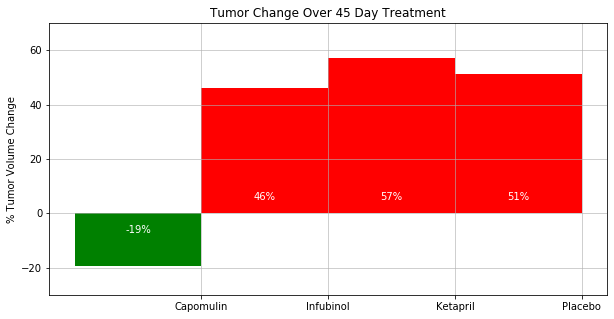

In [14]:
#general figure size
plt.figure(figsize= [10,5])

# Store all Relevant Percent Changes into a Tuple
pc_tuple = (pc["Capomulin"], pc["Infubinol"], pc["Ketapril"], pc["Placebo"])
x_axis = np.arange(len(pc_tuple))

# Splice the data between passing and failing drugs
pc_pass = plt.bar(x_axis[0], pc_tuple[0], width= -1, align="edge", color="green")
pc_fail1 = plt.bar(x_axis[1], pc_tuple[1], width= -1, align="edge", color="red") 
pc_fail2 = plt.bar(x_axis[2], pc_tuple[2], width= -1, align="edge", color="red") 
pc_fail3 = plt.bar(x_axis[3], pc_tuple[3], width= -1, align="edge", color="red") 

# Orient widths. Add labels, tick marks, etc. 
plt.title("Tumor Change Over 45 Day Treatment")
plt.xticks(x_axis, ["Capomulin","Infubinol", "Ketapril","Placebo"])
plt.ylabel("% Tumor Volume Change")
plt.grid(True, alpha=0.75)
plt.ylim(-30,70)

# Use functions to label the percentages of changes
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabelpass(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
    plt.annotate('{:,.0f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, -8),
                    ha='center', va='bottom', color='white')

def autolabelfail(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
    plt.annotate('{:,.0f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, 8),
                    ha='center', va='top', color='white')

# Call functions to implement the function calls
autolabelpass(pc_pass)
autolabelfail(pc_fail1)
autolabelfail(pc_fail2)
autolabelfail(pc_fail3)

#save and show
plt.savefig("4_tumorvolchange.png")
plt.show()
